In [172]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Let's import the aln model
from neurolib.models.aln import ALNModel

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'


In [173]:
# Create the model
model = ALNModel()

# Each model comes with a set of default parameters which are a dictionary. 
# Let's change the parameter that controls the duration of a simulation to 10s.
model.params['duration'] = 10.0 * 1000  

# For convenience, we could also use:
model.params.duration = 10.0 * 1000

# In the aln model an Ornstein-Uhlenbeck process is simulated in parallel
# as the source of input noise fluctuations. Here we can set the variance
# of the process. 
# For more info: https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process 
# Let's add some noise.
model.params['sigma_ou'] = 0.1

# Finally, we run the model
model.run()

In [202]:
model['rates_exc']

array([[1.30226956e+000, 1.77542067e+001, 1.96925384e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127],
       [4.32103018e-003, 1.01358733e+001, 1.08892381e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127],
       [7.87738529e+001, 6.33158729e+001, 6.22060388e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127],
       ...,
       [4.78912459e+001, 4.57044541e+001, 4.23068534e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127],
       [6.59390101e+001, 5.64044099e+001, 5.89140077e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127],
       [4.00854235e+000, 2.09583035e+001, 2.20644761e+001, ...,
        3.73159710e-127, 3.73159710e-127, 3.73159710e-127]])

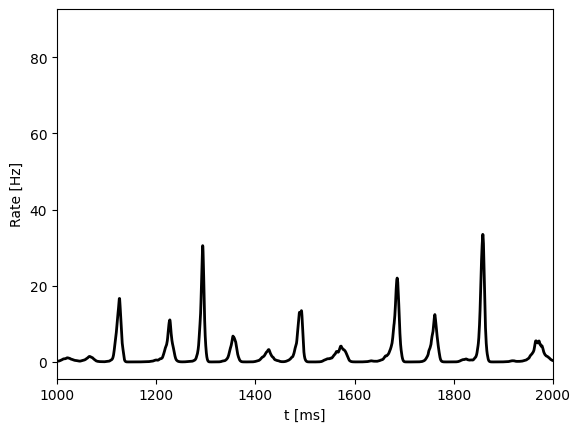

In [174]:
plt.plot(model['t'], model['rates_exc'].T, lw=2, c='k')
plt.xlabel("t [ms]")
plt.ylabel("Rate [Hz]")
plt.xlim(1000, 2000);

In [175]:
model.params['duration'] = 60.0 * 1000  
model.params['sigma_ou'] = 0.0 # set noise to zero
model.params['mui_ext_mean'] = 0.5 # set external input to the inhibitory population


In [176]:
max_rate_e = []
min_rate_e = []
# these are the different input values that we want to scan
mue_inputs = np.linspace(0, 2, 50)
for mue in mue_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    model.params['mue_ext_mean'] = mue
    model.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_rate_e.append(np.max(model.output[0, -int(1000/model.params['dt']):]))
    min_rate_e.append(np.min(model.output[0, -int(1000/model.params['dt']):]))


Text(0, 0.5, 'Min / max firing rate')

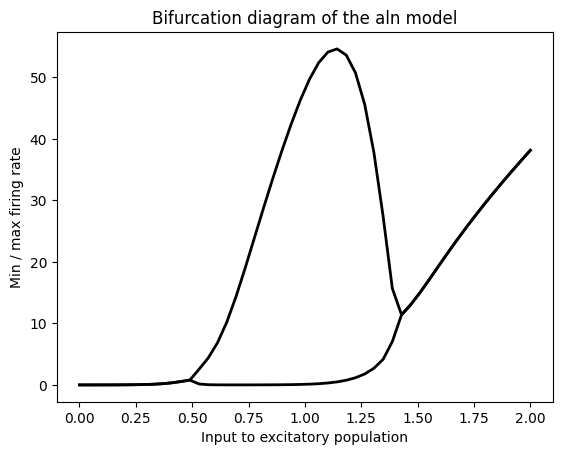

In [177]:
plt.plot(mue_inputs, max_rate_e, c='k', lw = 2)
plt.plot(mue_inputs, min_rate_e, c='k', lw = 2)
plt.title("Bifurcation diagram of the aln model")
plt.xlabel("Input to excitatory population")
plt.ylabel("Min / max firing rate")

In [187]:
# Load structural connectivity matrices
weights_file = "0035_1_Counts.csv"
length_file = "0035_1_Lengths.csv"

weights = np.loadtxt(weights_file, delimiter=',')
length = np.loadtxt(length_file, delimiter=',')

In [195]:
model = ALNModel(Cmat = weights, Dmat = length)

model.params['duration'] = 60*1000 # use 5*60*1000 for real simulation
# model.params['mui_ext_mean'] = 0.5 
model.params['sigma_ou'] = 0.1  # noise

In [196]:
model.run()

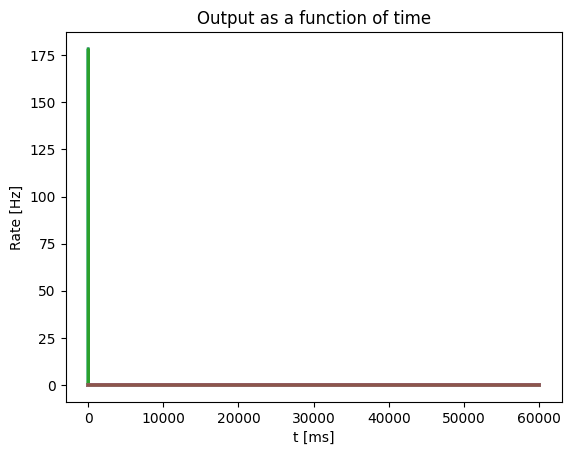

In [216]:
output = model.outputs
plt.plot(output['t'][100:], output['rates_exc'].T[100:, :], lw=2)
plt.xlabel("t [ms]")
plt.ylabel("Rate [Hz]")
plt.title("Output as a function of time")
plt.show()

In [191]:
# print(output)
# Calculate summary statistics of the output
output_summary = {
    'mean_exc': np.mean(output['rates_exc']),
    'std_exc': np.std(output['rates_exc']),
    'min_exc': np.min(output['rates_exc']),
    'max_exc': np.max(output['rates_exc']),
    'mean_inh': np.mean(output['rates_inh']),
    'std_inh': np.std(output['rates_inh']),
    'min_inh': np.min(output['rates_inh']),
    'max_inh': np.max(output['rates_inh'])
}

# Print the summary statistics
for key, value in output_summary.items():
    print(f"{key}: {value}")

mean_exc: 0.012535293089037957
std_exc: 1.4608844976954776
min_exc: 3.731597100406975e-127
max_exc: 178.3589602664116
mean_inh: 0.7890693490516253
std_inh: 0.6094754671929895
min_inh: 0.026152339944840335
max_inh: 88.52881247454641


In [192]:
max_rate_e = []
min_rate_e = []
# these are the different input values that we want to scan
mue_inputs = np.linspace(0, 10, 50)
for mue in mue_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    model.params['mue_ext_mean'] = mue
    model.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_rate_e.append(np.max(model.output[0, -int(1000/model.params['dt']):]))
    min_rate_e.append(np.min(model.output[0, -int(1000/model.params['dt']):]))

Text(0, 0.5, 'Min / max firing rate')

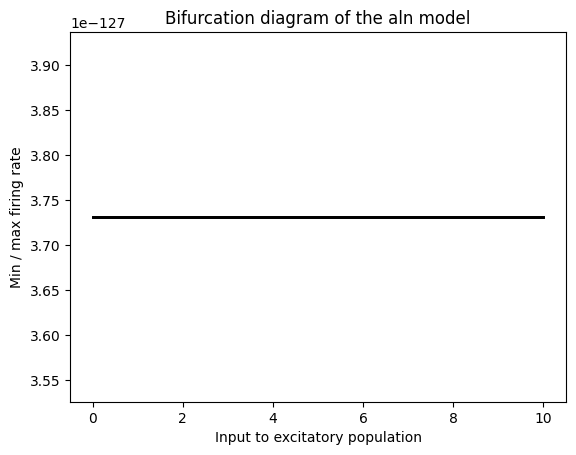

In [193]:
plt.plot(mue_inputs, max_rate_e, c='k', lw = 2)
plt.plot(mue_inputs, min_rate_e, c='k', lw = 2)
plt.title("Bifurcation diagram of the aln model")
plt.xlabel("Input to excitatory population")
plt.ylabel("Min / max firing rate")

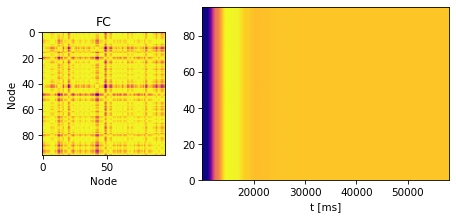

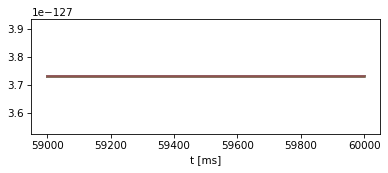

In [194]:
# Plot functional connectivity and BOLD timeseries (z-scored)
fig, axs = plt.subplots(1, 2, figsize=(7, 3), dpi=75, gridspec_kw={'width_ratios' : [1, 2]})
axs[0].imshow(func.fc(model.BOLD.BOLD[:, 5:]))
axs[1].imshow(scipy.stats.mstats.zscore(model.BOLD.BOLD[:, model.BOLD.t_BOLD>10000], axis=1), aspect='auto', extent=[model.BOLD.t_BOLD[model.BOLD.t_BOLD>10000][0], model.BOLD.t_BOLD[-1], 0, model.params['N']]);

axs[0].set_title("FC")
axs[0].set_xlabel("Node")
axs[0].set_ylabel("Node")
axs[1].set_xlabel("t [ms]")

# the results of the model are also accessible through an xarray DataArray
fig, axs = plt.subplots(1, 1, figsize=(6, 2), dpi=75)
plt.plot(model.xr().time[-10000:], model.xr().loc['rates_exc'].T[-10000:])
plt.xlabel("t [ms]");
